# 4.10: Coding Etiquette & Excel Reporting Part 1

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# file location path is defined.
path = r'C:\Users\User\02.25 Instacart Basket Analysis'

In [6]:
# The cust_ords_prods_merge_ (most up-to-date project data) DataFrame is imported
df_ords = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge_.pkl'))

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [8]:
#  Here PII data was adressed by droping two columns: 'First Name' and 'Last_name'.
df = df.drop(columns = ['First Name', 'Last_name'])

In [9]:
# A general overview of the DataFrame is performed to check for irregularities.
df.head()

,user_id,Gender,State,Age,dependants,fam_status,income,order_id,order_number,order_dow,...,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_price,mean_price,spending_type,median_frequency,frequent_customers
0,26711,Female,Missouri,48,3,married,165665,518967,1,2,...,4.3,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,3,married,165665,423547,2,2,...,12.6,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,12.6,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,4.3,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,7.1,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer


# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [11]:
# A new column called 'region' is created, where each user's state is mapped to its corresponding U.S. region.
df.loc[df['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df.loc[df['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df.loc[df['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df.loc[df['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [12]:
# A general overview of the DataFrame is performed to check for irregularities.
df.head()

,user_id,Gender,State,Age,dependants,fam_status,income,order_id,order_number,order_dow,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_price,mean_price,spending_type,median_frequency,frequent_customers,region
0,26711,Female,Missouri,48,3,married,165665,518967,1,2,...,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,3,married,165665,423547,2,2,...,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,3,married,165665,2524893,3,3,...,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer,Midwest


In [13]:
# The groupby() function will check the frequency in the new column 'region', for unique users for each region with .user_id.nunique()
df.groupby(['region']).user_id.nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


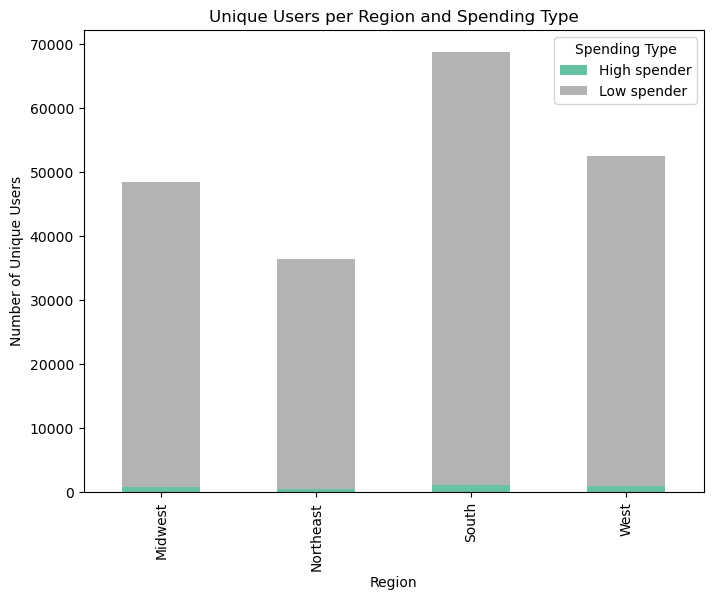

In [15]:
# Count unique users per region and spending_type
spending_type = df.pivot_table(index='region', columns='spending_type', values='user_id', aggfunc='nunique', fill_value=0)

# Plot stacked bar chart
spending_type_bar = spending_type.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Region")
plt.ylabel("Number of Unique Users")
plt.title("Unique Users per Region and Spending Type")
plt.legend(title="Spending Type")

# Show the plot
plt.show()

In [16]:
# Export the stacked bar chart
spending_type_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_type_bar.png'))

In [31]:
# Here is possible to observe the numbers for each region
spending_type

spending_type,High spender,Low spender
region,,
Midwest,802,47717
Northeast,545,35843
South,1145,67592
West,903,51662


In [33]:
# Here is possible to observe the total numbers for each spending_type
df.groupby(['spending_type']).user_id.nunique()

spending_type
High spender      3395
Low spender     202814
Name: user_id, dtype: int64

The South region has the highest number of both high and low spender clients, as it contains the largest number of clients among all regions.

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [37]:
# An aggregation of the maximum number of orders per user.
df.groupby(['max_order']).user_id.nunique()

max_order
1         1
2         3
3     23986
4     19588
5     16165
      ...  
95       67
96       54
97       50
98       47
99     1374
Name: user_id, Length: 99, dtype: int64

In [39]:
# A new column called 'low_activity_customers' is created, where each user's 'max_order' is used to determine if they fall under 'normal' or 'low' activity.
df.loc[df['max_order'] >= 5, 'low_activity_customers'] = 'Normal Activity Customer'
df.loc[df['max_order'] < 5, 'low_activity_customers'] = 'Low Activity Customer'

In [41]:
# Here is possible to observe the total numbers for each low_activity_customers
df.groupby(['low_activity_customers']).user_id.nunique()

low_activity_customers
Low Activity Customer        43578
Normal Activity Customer    162631
Name: user_id, dtype: int64

In [43]:
# The original DataFrame will be defined as df_no_low, indicating that this new DataFrame excludes low activity customers.
df_no_low = df.drop(df[df['low_activity_customers'] == 'Low Activity Customer'].index)

In [45]:
# Confirmation that the low active customers are no longer present in the DataFrame
df.groupby(['max_order']).user_id.nunique()

max_order
1         1
2         3
3     23986
4     19588
5     16165
      ...  
95       67
96       54
97       50
98       47
99     1374
Name: user_id, Length: 99, dtype: int64

In [47]:
# Export the new dataframe
df_no_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# Age Profile

In [51]:
# Age Profile
df_no_low.loc[df_no_low['Age'] <= 25, 'Age_Profile'] = 'Young'
df_no_low.loc[(df_no_low['Age'] > 25) & (df_no_low['Age'] <= 45), 'Age_Profile'] = 'Adult'
df_no_low.loc[(df_no_low['Age'] > 45) & (df_no_low['Age'] <= 65), 'Age_Profile'] = 'Middle aged'
df_no_low.loc[df_no_low['Age'] > 65, 'Age_Profile'] = 'Senior'

In [53]:
# Here is possible to observe the numbers for each Age_Profile
df_no_low.groupby(['Age_Profile']).user_id.nunique()

Age_Profile
Adult          50799
Middle aged    50866
Senior         40769
Young          20197
Name: user_id, dtype: int64

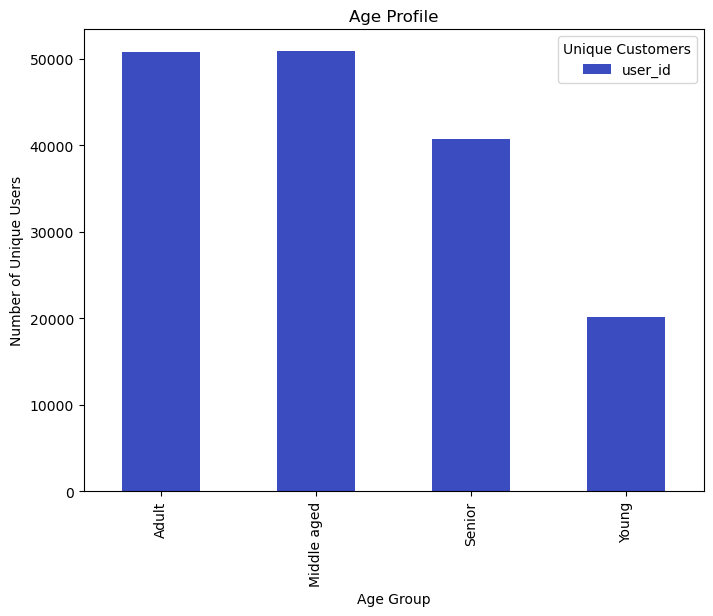

In [55]:
# Count unique users per Age profile
pivot_df = df_no_low.pivot_table(index='Age_Profile', values='user_id', aggfunc='nunique', fill_value=0)

# Plot bar chart
Age_Profile_bar = pivot_df.plot(kind='bar', stacked=False, figsize=(8, 6), colormap='coolwarm') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Unique Users")
plt.title("Age Profile")
plt.legend(title="Unique Customers")

# Show the plot
plt.show()

In [57]:
# Export the bar chart
Age_Profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Profile_bar.png'))

# Income Profile

In [60]:
# Income Profile
df_no_low.loc[df_no_low['income'] <= 40000, 'Salary_Profile'] = 'low salary'
df_no_low.loc[(df_no_low['income'] > 40000) & (df_no_low['income'] <= 100000), 'Salary_Profile'] = 'middle salary'
df_no_low.loc[df_no_low['income'] > 100000, 'Salary_Profile'] = 'high salary'

In [62]:
# Here is possible to observe the numbers for each Salary_Group
df_no_low.groupby(['Salary_Profile']).user_id.nunique()

Salary_Profile
high salary      70080
low salary       12625
middle salary    79926
Name: user_id, dtype: int64

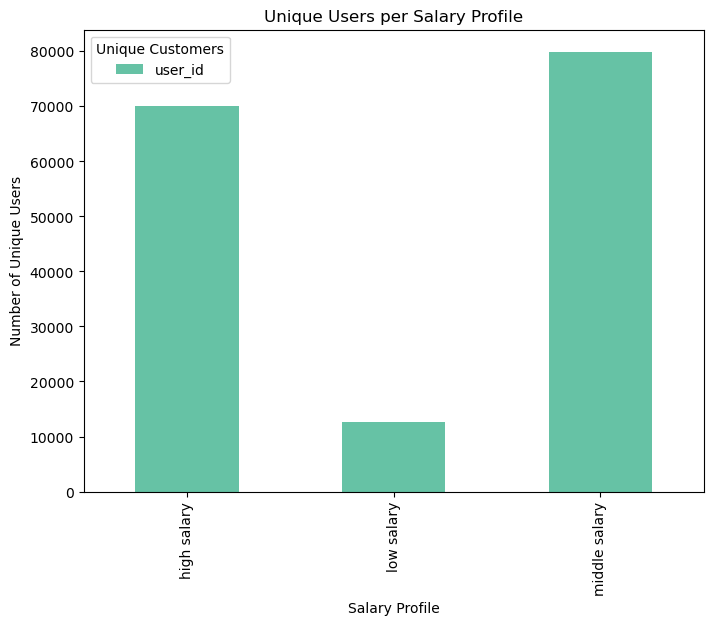

In [64]:
# Count unique users per region and spending_type
salary_group = df_no_low.pivot_table(index='Salary_Profile', values='user_id', aggfunc='nunique', fill_value=0)

# Plot stacked bar chart
salary_profile_bar = salary_group.plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Salary Profile")
plt.ylabel("Number of Unique Users")
plt.title("Unique Users per Salary Profile")
plt.legend(title="Unique Customers")

# Show the plot
plt.show()

In [66]:
# Export the bar chart
salary_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'salary_profile_bar.png'))

# Department Id Profile

In [99]:
# Import departments dataframe
df_depart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [101]:
df_depart

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [103]:
# Change the name of the column Unamed into department_id
df_depart.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [107]:
df_complete = df_no_low.merge(df_depart, on='department_id', indicator=False)

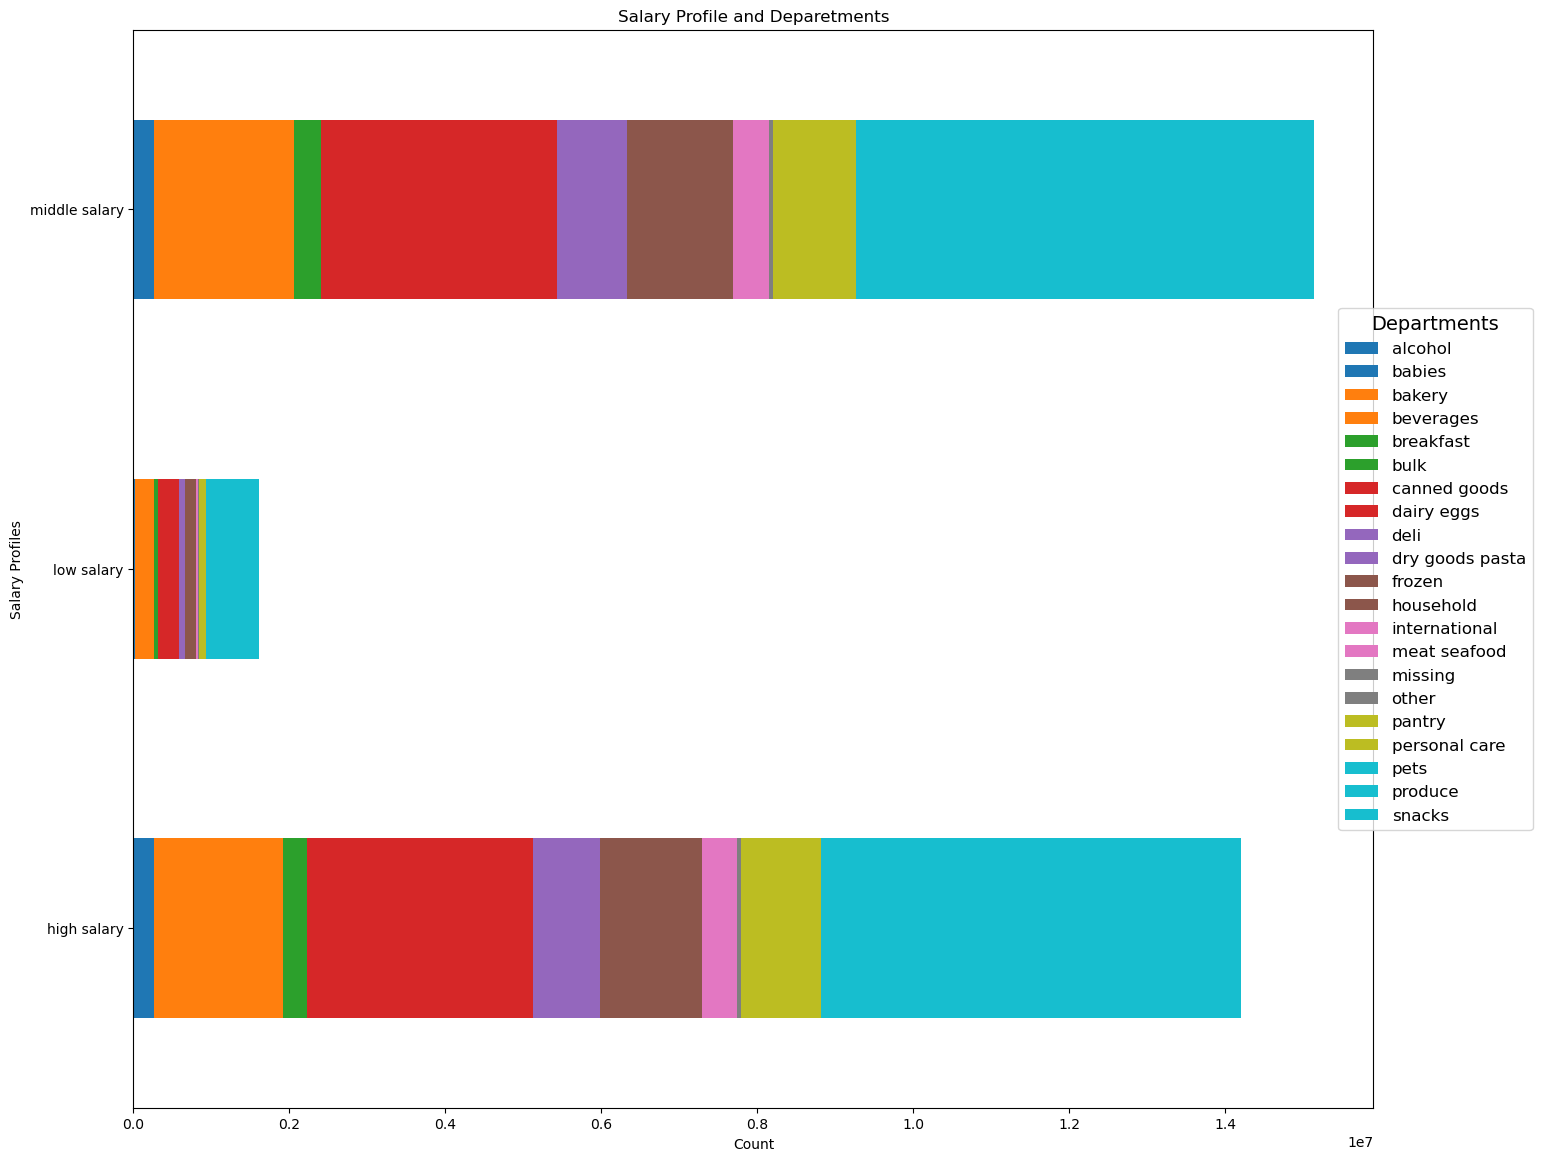

In [165]:
# Income vs Department id Profile
sal_dept_profile = pd.crosstab(df_complete['Salary_Profile'], df_complete['department'], dropna = False)

# Plot horizontal stacked bar chart
sal_dept_profile_bar = sal_dept_profile.plot(kind='barh', stacked=True, figsize=(16, 14), colormap='tab10') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Count")
plt.ylabel("Salary Profiles")
plt.title("Salary Profile and Deparetments")
plt.legend(title="Departments", bbox_to_anchor=(1.05, 0.5), loc='center', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [148]:
# Export the barh chart
sal_dept_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sal_dept_profile_barh.png'))

In [139]:
# Here is possible to observe the numbers for each salary_department_profile
sal_dept_profile

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Salary_Profile,,,,,,,,,,,,,,,,,,,,,
high salary,69142,196696,527703,1126437,297594,14218,485226,2406160,462089,392709,...,319958,119987,335535,29452,15749,839920,193412,45089,4236921,1104579
low salary,8718,12547,49409,191662,46066,2247,34946,235552,51355,29283,...,42766,9997,12907,3121,1990,77129,22823,4421,380567,292144
middle salary,66767,201149,543716,1253802,327190,16986,491902,2535470,490390,400144,...,337133,126007,326339,32195,16672,865656,208071,43550,4461785,1369683


# Number of Dependents Profile

In [69]:
# Number of Dependents Profile
df_no_low.loc[df_no_low['dependants'] == 0, 'dependants_profile'] = 'No Dependants'
df_no_low.loc[df_no_low['dependants'] >= 1, 'dependants_profile'] = 'Has Dependants'

In [71]:
# Here is possible to observe the numbers for each dependants_profile
df_no_low.groupby(['dependants_profile']).user_id.nunique()

dependants_profile
Has Dependants    121904
No Dependants      40727
Name: user_id, dtype: int64

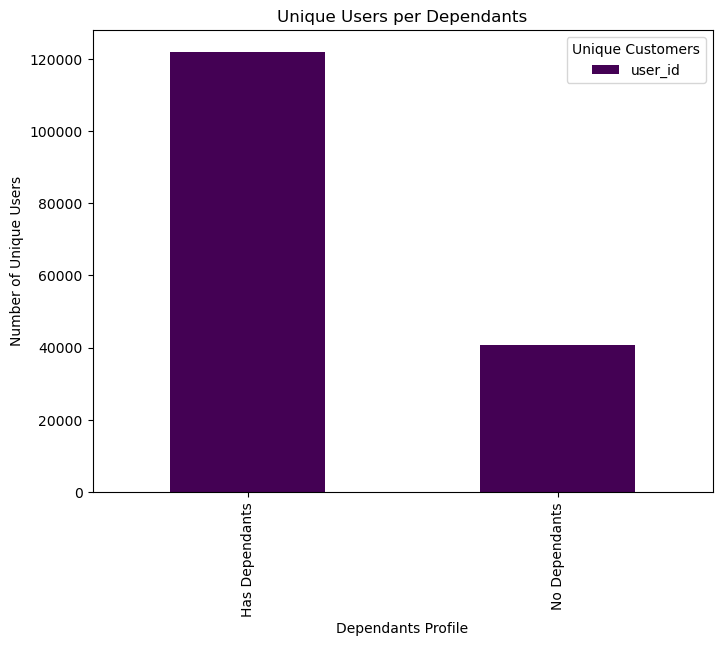

In [75]:
# Count unique users per dependants
dependants_group = df_no_low.pivot_table(index='dependants_profile', values='user_id', aggfunc='nunique', fill_value=0)

# Plot stacked bar chart
dependants_profile_bar = dependants_group.plot(kind='bar', stacked=False, figsize=(8, 6), colormap='viridis') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Dependants Profile")
plt.ylabel("Number of Unique Users")
plt.title("Unique Users per Dependants")
plt.legend(title="Unique Customers")

# Show the plot
plt.show()

In [77]:
# Export the bar chart
dependants_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_profile_bar.png'))

# 6. Create an appropriate visualization to show the distribution of profiles.

Every Profile includes a visualization.

# 7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [90]:
# Expenditure Statistical Analysis
df_no_low.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number                prices               
                 max min       mean    max  min      mean
user_id                                                  
1                 10   1   5.813559   14.0  1.0  6.367797
2                 14   1   8.035897   14.8  1.3  7.515897
3                 12   1   6.000000   14.4  1.3  8.197727
4                  5   1   2.888889   14.6  1.4  8.205556
7                 20   1   9.645631   23.2  1.1  7.466990
...              ...  ..        ...    ...  ...       ...
206203             5   1   2.983193   25.0  1.0  7.138655
206206            67   1  38.007018   14.8  1.1  7.646667
206207            16   1   8.116592   24.7  1.2  7.313453
206208            49   1  25.505170   21.6  1.1  8.366617
206209            13   1   6.937984   18.8  1.1  7.058915

[162631 rows x 6 columns]

In [92]:
# Frequency Statistical Analysis
df_no_low.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# Age Profile and Region

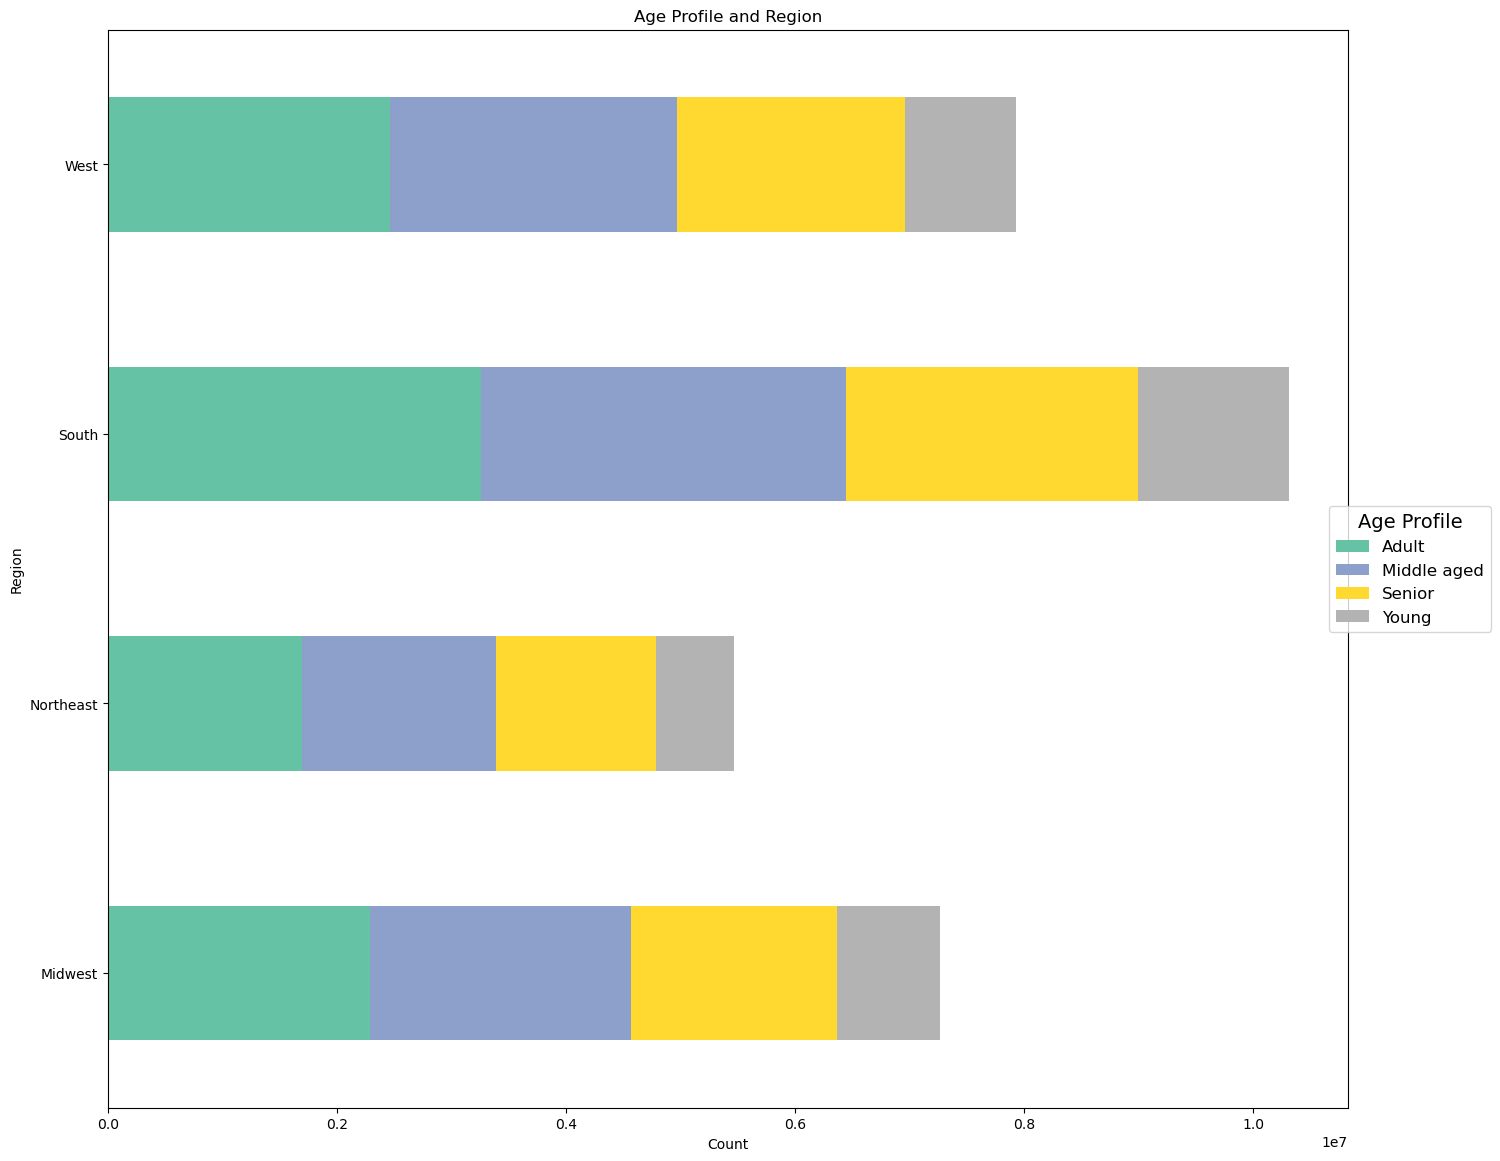

In [166]:
# Age Profile and Region
age_region = pd.crosstab(df_complete['region'], df_complete['Age_Profile'], dropna = False)

# Plot horizontal stacked bar chart
age_region_barh = age_region.plot(kind='barh', stacked=True, figsize=(16, 14), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Age Profile and Region")
plt.legend(title="Age Profile", bbox_to_anchor=(1.05, 0.5), loc='center', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [169]:
# Export the barh chart
age_region_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_barh.png'))

In [160]:
# Here is possible to observe the numbers for each age_region values
age_region

Age_Profile,Adult,Middle aged,Senior,Young
region,,,,
Midwest,2286075,2277677,1799606,898155
Northeast,1693019,1697267,1394490,679909
South,3261271,3185845,2549034,1314989
West,2462174,2505884,1987704,971465


# Salary Profile and Region

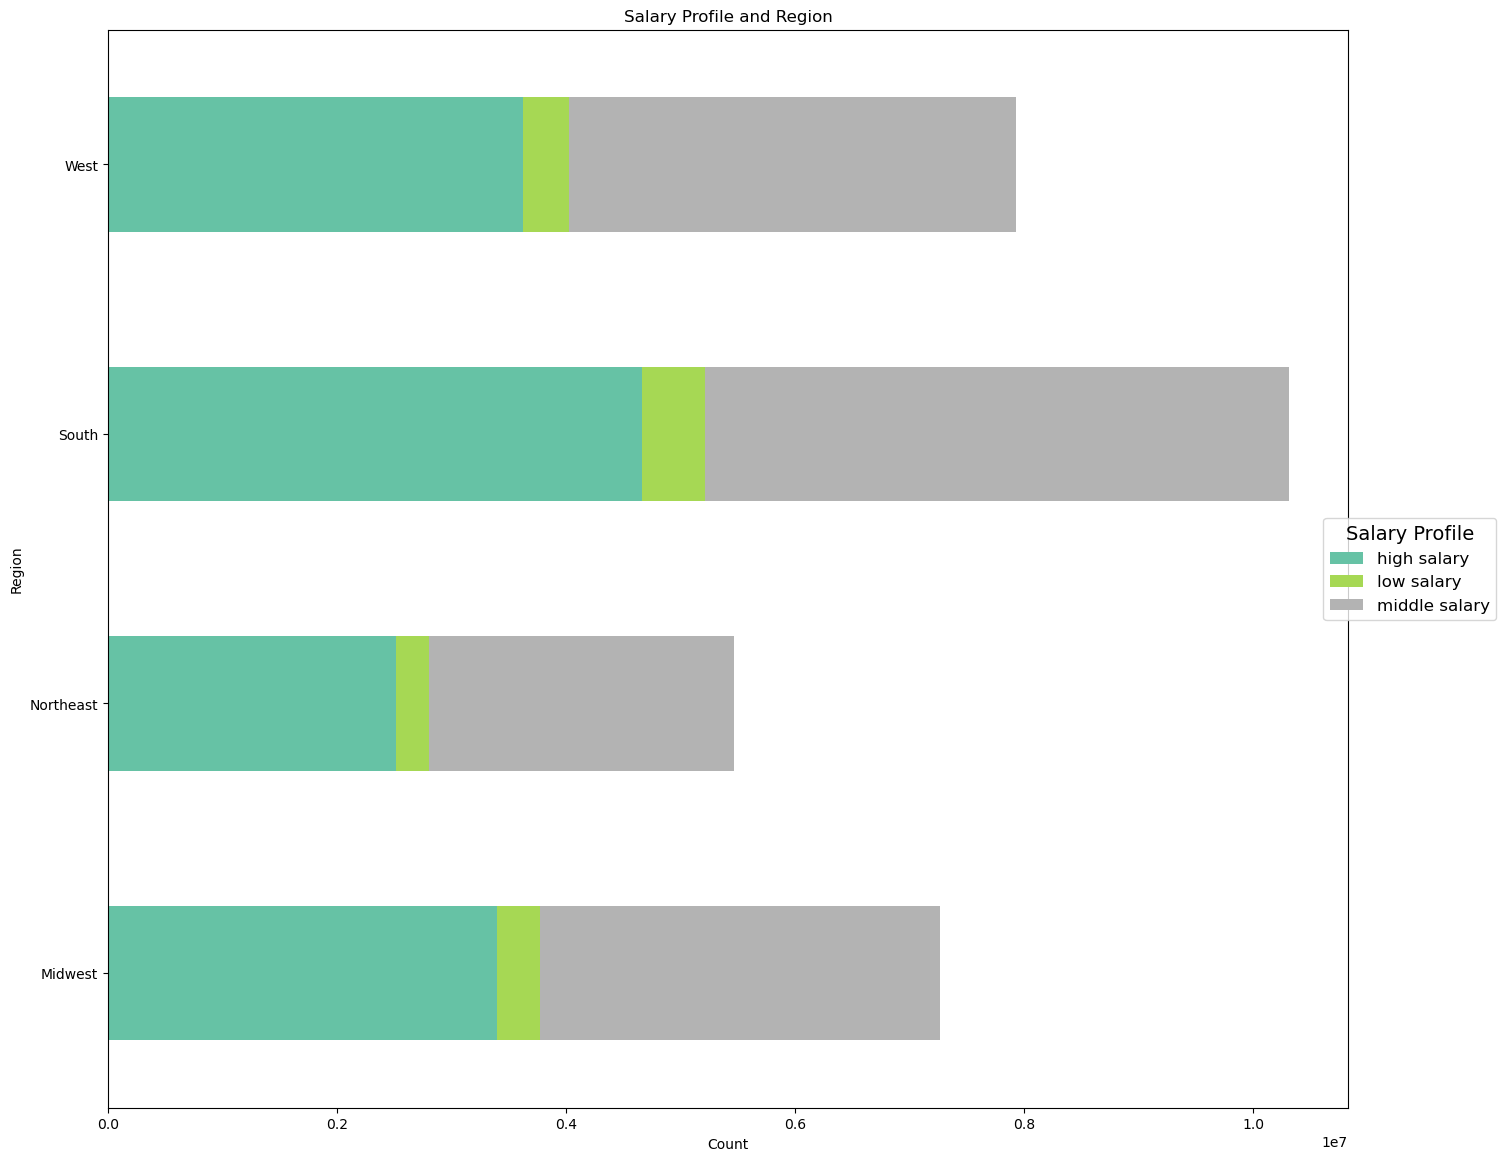

In [173]:
# Age Profile and Region
salary_region = pd.crosstab(df_complete['region'], df_complete['Salary_Profile'], dropna = False)

# Plot horizontal stacked bar chart
salary_region_barh = salary_region.plot(kind='barh', stacked=True, figsize=(16, 14), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Salary Profile and Region")
plt.legend(title="Salary Profile", bbox_to_anchor=(1.05, 0.5), loc='center', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [177]:
# Export the barh chart
salary_region_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'salary_region_barh.png'))

In [175]:
# Here is possible to observe the numbers for each salary_region values
salary_region

Salary_Profile,high salary,low salary,middle salary
region,,,
Midwest,3400093,373583,3487837
Northeast,2516484,283124,2665077
South,4663571,552104,5095464
West,3626880,403214,3897133


# Age Profile and Department

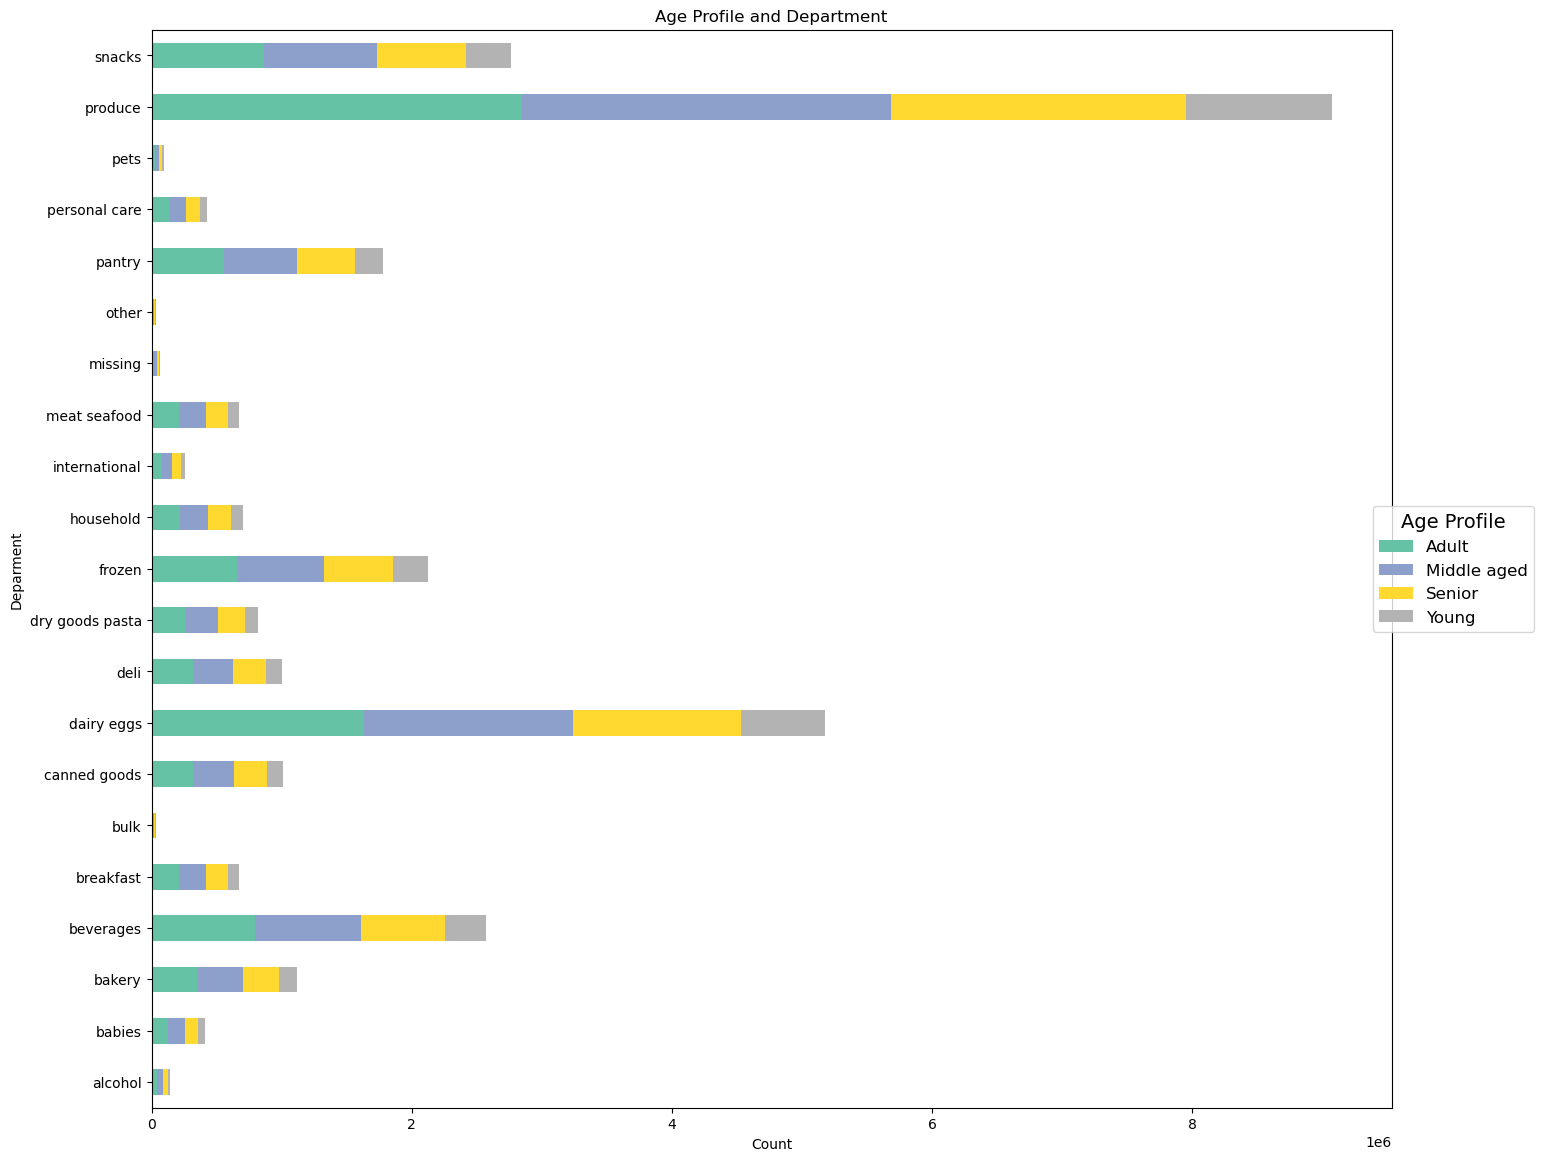

In [190]:
# Age Profile and Region
age_dept = pd.crosstab(df_complete['department'], df_complete['Age_Profile'], dropna = False)

# Plot horizontal stacked bar chart
age_dept_barh = age_dept.plot(kind='barh', stacked=True, figsize=(16, 14), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Count")
plt.ylabel("Deparment")
plt.title("Age Profile and Department")
plt.legend(title="Age Profile", bbox_to_anchor=(1.05, 0.5), loc='center', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [194]:
# Export the barh chart
age_dept_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dept_barh.png'))

In [192]:
# Here is possible to observe the numbers for each age_dept values
age_dept

Age_Profile,Adult,Middle aged,Senior,Young
department,,,,
alcohol,45481,45267,34691,19188
babies,130299,128697,100162,51234
bakery,352102,350395,278458,139873
beverages,797642,809502,646414,318343
breakfast,209410,210472,165491,85477
bulk,10421,10388,8336,4306
canned goods,317972,315850,251940,126312
dairy eggs,1630318,1608332,1291039,647493
deli,315618,313198,250463,124555


# Salary Profile and Department

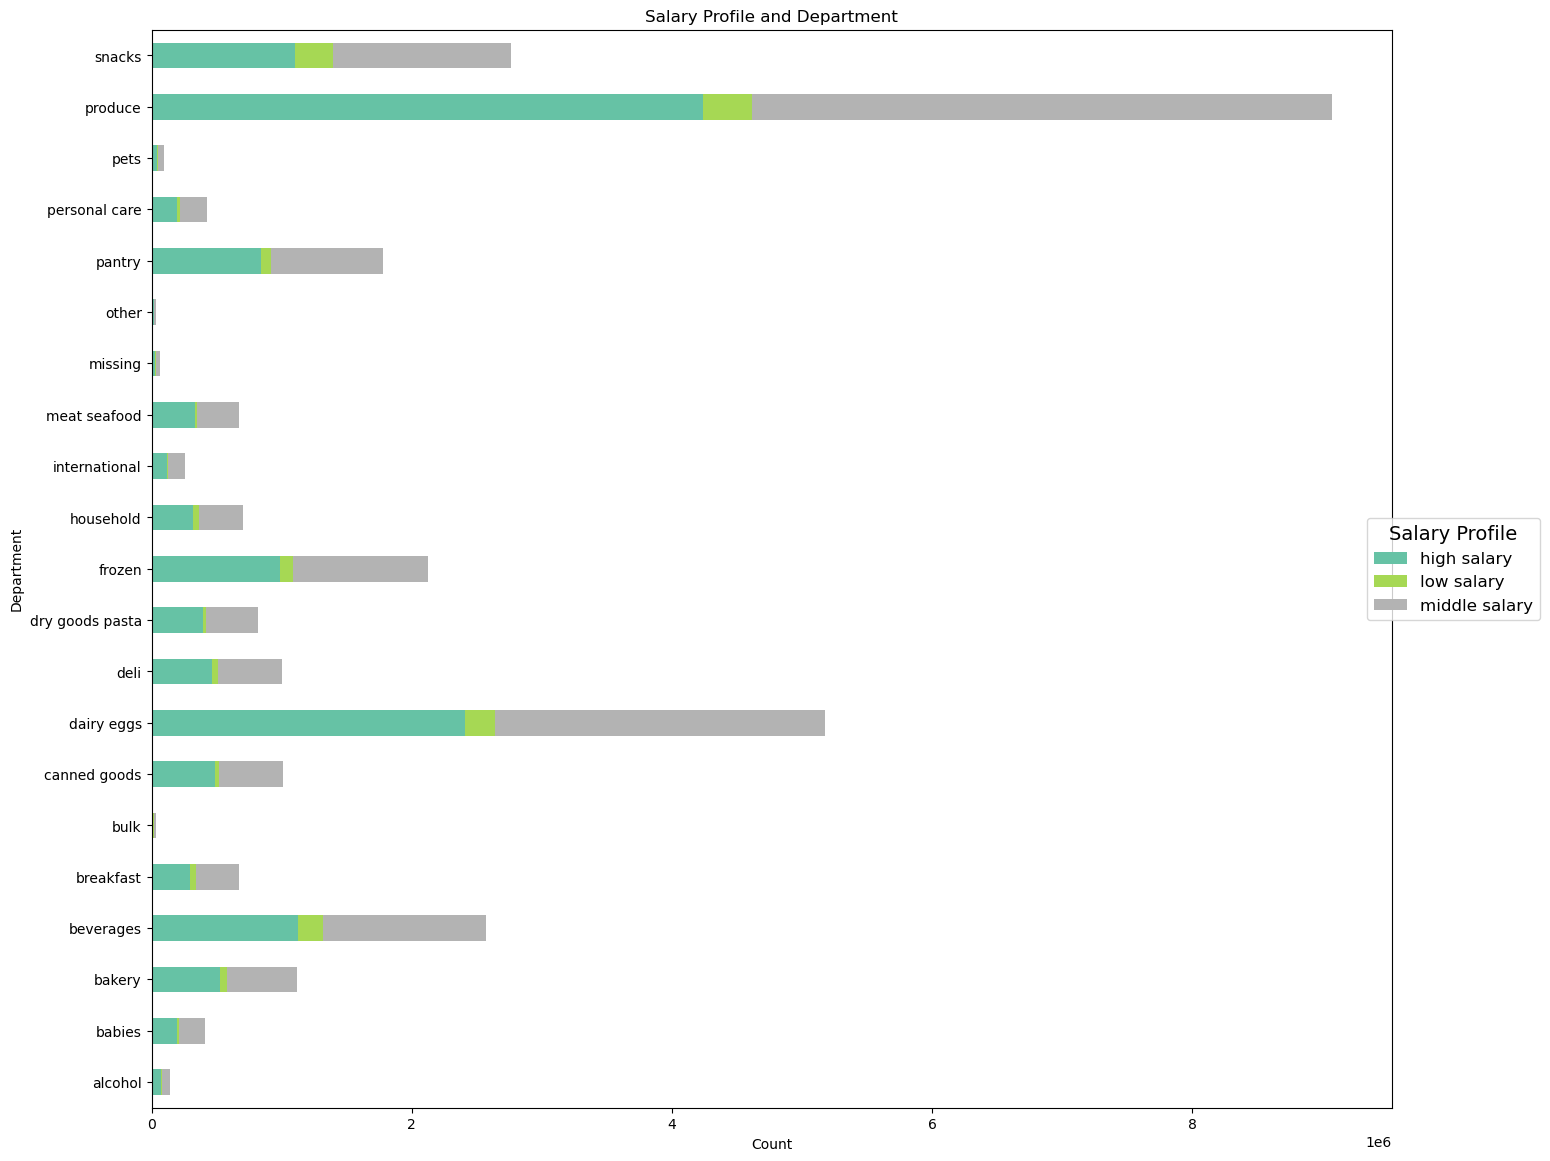

In [201]:
# Age Profile and Region
salary_department = pd.crosstab(df_complete['department'], df_complete['Salary_Profile'], dropna = False)

# Plot horizontal stacked bar chart
salary_department_barh = salary_department.plot(kind='barh', stacked=True, figsize=(16, 14), colormap='Set2') 

#Popular Colormap Options:
#'viridis' (default in the previous example) – Good for clarity
#'plasma' – Bright and vibrant
#'coolwarm' – Blue-red gradient
#'Pastel1' – Soft pastel shades
#'Set2' – Muted and pleasing
#'tab10' – 10 distinct colors, great for categories

# Labels and title
plt.xlabel("Count")
plt.ylabel("Department")
plt.title("Salary Profile and Department")
plt.legend(title="Salary Profile", bbox_to_anchor=(1.05, 0.5), loc='center', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [203]:
# Export the barh chart
salary_department_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'salary_department_barh.png'))

In [205]:
# Here is possible to observe the numbers for each salary_department values
salary_department

Salary_Profile,high salary,low salary,middle salary
department,,,
alcohol,69142,8718,66767
babies,196696,12547,201149
bakery,527703,49409,543716
beverages,1126437,191662,1253802
breakfast,297594,46066,327190
bulk,14218,2247,16986
canned goods,485226,34946,491902
dairy eggs,2406160,235552,2535470
deli,462089,51355,490390


# 9. Produce suitable charts to illustrate your results and export them in your project folder.

# 10. Tidy up your script, export your final data set, and save your notebook.

In [209]:
df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_complete.pkl'))